In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
import numpy as np
from tensorflow.keras.callbacks import TensorBoard
import time

In [2]:
DATADIR = ('Dataset')
CATEGORIES = ['1', '2', '3', '4', '5', '6']

In [3]:
IMG_SIZE = 60
training_data = []

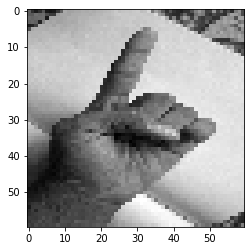

In [4]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        plt.imshow(new_array, cmap = 'gray')
        plt.show()
        break
    break

In [5]:
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        print(class_num)
       

create_training_data()

0
1
2
3
4
5


In [6]:
print(len(training_data))

10772


In [7]:
import random
random.shuffle(training_data)

In [8]:
X = []
y = []

In [9]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [10]:
X.shape

(10772, 60, 60, 1)

In [11]:
X = X/255.0
y = np.array(y)

In [12]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (60, 60, 1), activation = 'relu'))
model.add(Conv2D(32, (3,3), activation = 'relu'))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))

model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(Conv2D(128, (3,3), activation = 'relu'))

model.add(Flatten())

model.add(Dropout(0.40))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.40))
model.add(Dense(6, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 58, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 54, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 128)       1

In [13]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [14]:
model.fit(X, y, epochs = 10, batch_size = 32, validation_split=0.3)

Epoch 1/10
236/236 [==============================] - 206s 872ms/step - loss: 1.3828 - accuracy: 0.4202 - val_loss: 0.9607 - val_accuracy: 0.6417
Epoch 2/10
236/236 [==============================] - 216s 914ms/step - loss: 0.8829 - accuracy: 0.6573 - val_loss: 0.8017 - val_accuracy: 0.7116
Epoch 3/10
236/236 [==============================] - 214s 907ms/step - loss: 0.6487 - accuracy: 0.7586 - val_loss: 0.5077 - val_accuracy: 0.8113
Epoch 4/10
236/236 [==============================] - 210s 890ms/step - loss: 0.4509 - accuracy: 0.8416 - val_loss: 0.3658 - val_accuracy: 0.8960
Epoch 5/10
236/236 [==============================] - 208s 881ms/step - loss: 0.3496 - accuracy: 0.8752 - val_loss: 0.2739 - val_accuracy: 0.9208
Epoch 6/10
236/236 [==============================] - 212s 898ms/step - loss: 0.2485 - accuracy: 0.9178 - val_loss: 0.2167 - val_accuracy: 0.9384
Epoch 7/10
236/236 [==============================] - 219s 926ms/step - loss: 0.2266 - accuracy: 0.9225 - val_loss: 0.1972 -

In [16]:
model.save('hcmodel')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: hcmodel\assets
